In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('Position_Salaries.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
X = df.iloc[:, 1:-1].values
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [4]:
y = df.iloc[:, -1].values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

## Feature scaling

We need to convert our y to a 2D array. Usually this would be done for us when splitting the data into training and testing however, as we are using the full data set to train our model we need to convert it ourselves.

The reason for converting it to a 2D array is because it needs to be in this format in order to pass it through our StandardScaler.

In [5]:
y = y.reshape(len(y), 1)
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

In [6]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X = sc_X.fit_transform(X)
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [7]:
sc_y = StandardScaler()
y = sc_y.fit_transform(y)
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

## Training the SVR model

When using SVM we have to define a parameter - kernel. This parameter specifies the kernel type to be used. More information on the type of kernels can be defined at https://data-flair.training/blogs/svm-kernel-functions/.

For our example we will use rbf kernel. This stands for Gaussian Radial Basis Function.

In [8]:
from sklearn.svm import SVR

svr_reg = SVR(kernel='rbf')
svr_reg.fit(X, y)

/Users/metinalisho/anaconda3/envs/ml-az/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

Recall, our business problem is to predict the salary for a specific position level. However, 6.5 is not on the same scale as the rest of our X values. So we have to scale this using the transform method.

See https://github.com/DataVizWiz/A-Z-Machine-Learning-with-Python/blob/main/01-Data-Preprocessing/Data-Preprocessing.ipynb on why we use the transform method rather than the fit_transform method.

Remember to pass through a point to transform method, it must be a matrix.

In [9]:
sample = np.array([[6.5]])
sample_trans = sc_X.transform(sample)

sample_pred = svr_reg.predict(sample_trans)
sample_pred

array([-0.27861589])

We have to pass the value as a 2D array for it to be valid for the inverse_transform method but then we need to flatten it for later on.

In [10]:
sample_inv = sc_y.inverse_transform([sample_pred]).flatten()
sample_inv

array([170370.0204065])

## Visualising the SVR results

Again, before we plot our graph we have to reverse our scaling for X and y to get our 'real' values. Then we have to carry out our inverse and predict method on X to get our predicted y.

In [11]:
X_inv = sc_X.inverse_transform(X)
y_inv = sc_y.inverse_transform(y)

y_pred = sc_y.inverse_transform([svr_reg.predict(X)]).flatten()

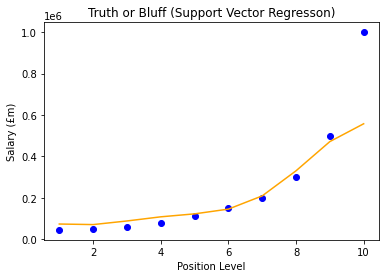

In [12]:
plt.scatter(X_inv, y_inv, color='blue')
plt.plot(X_inv, y_pred, color='orange')
plt.title('Truth or Bluff (Support Vector Regresson)')
plt.xlabel('Position Level')
plt.ylabel('Salary (£m)')
plt.show()

## Visualising the SVR results for higher resolution & smoother curve

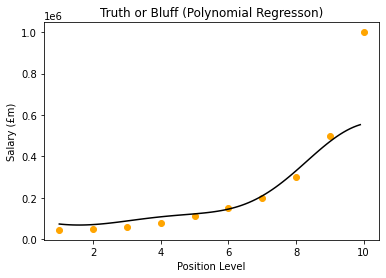

In [21]:
X_grid = np.arange(min(X_inv), max(X_inv), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
X_grid_trans = sc_X.transform(X_grid)

X_grid_pred = sc_y.inverse_transform([svr_reg.predict(X_grid_trans)]).flatten()

plt.scatter(X_inv, y_inv, color='orange')
plt.plot(X_grid, X_grid_pred, color='black')
plt.title('Truth or Bluff (Polynomial Regresson)')
plt.xlabel('Position Level')
plt.ylabel('Salary (£m)')
plt.show()